In [2]:
import spacy
import pandas as pd


data = pd.read_csv('/Users/lucasoleri/Desktop/DSBA Second Semester/Innovation and Marketing Analytics/Assignment/Datasets/article_links_updated.csv', sep=',')
data = data.rename(columns={'0': 'URL'})
data

,URL,article,date,text_up
0,https://www.aljazeera.com/news/2024/4/24/uncov...,"[<p class=""article__subhead css-1wt8oh6""><em>M...",2024-04-24,[ More than 300 bodies retrieved from two of t...
1,https://www.aljazeera.com/news/2024/4/23/hezbo...,"[<p class=""article__subhead css-1wt8oh6""><em>T...",2024-04-23,[ The attack comes after Hezbollah said Israel...
2,https://www.aljazeera.com/news/2024/4/23/by-th...,"[<p class=""article__subhead css-1wt8oh6""><em>M...",2024-04-23,"[ More than 34,000 Palestinians have been kill..."
3,https://www.aljazeera.com/news/2024/4/23/as-mo...,"[<p class=""article__subhead css-1wt8oh6""><em>U...",2024-04-23,[ UN human rights chief calls for independent ...
4,https://www.aljazeera.com/news/2024/4/23/what-...,"[<p class=""article__subhead css-1wt8oh6""><em>T...",2024-04-23,[ Tech workers are protesting against the use ...
...,...,...,...,...
2169,https://www.aljazeera.com/news/2023/2/22/pales...,"[<p class=""article__subhead css-1wt8oh6""><em>T...",2023-02-22,[ The Palestinian Authority reportedly withdre...
2170,https://www.aljazeera.com/news/2023/2/22/israe...,"[<p class=""article__subhead css-1wt8oh6""><em>D...",2023-02-22,[ Dozens of Palestinians also wounded by live ...
2171,https://www.aljazeera.com/news/2023/2/21/top-u...,"[<p class=""article__subhead css-1wt8oh6""><em>T...",2023-02-21,[ The decision does not necessarily mean that ...
2172,https://www.aljazeera.com/news/2023/2/21/pales...,"[<p class=""article__subhead css-1wt8oh6""><em>M...",2023-02-21,"[ Muntaser al-Shawwa, 16, was severely wounded..."


In [6]:
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

def clean_text(text):
    '''reduce text to lower-case lexicon entry'''
    lemmas = [token.lemma_ for token in nlp(text)
              if token.pos_ in {'NOUN', 'VERB', 'ADJ', 'ADV', 'PROPN'}]
    return ' '.join(lemmas)

data['clean_text'] = data['text_up'].apply(clean_text)
data['clean_text']

OSError: [E050] Can't find model 'en_core_web_sm'. It doesn't seem to be a Python package or a valid path to a data directory.

In [10]:
import nltk
nltk.downloader.download('vader_lexicon')
nltk.download('punkt')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/imamabdullah/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/imamabdullah/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [11]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.preprocessing import LabelEncoder

sid = SentimentIntensityAnalyzer()

sentiments = []
for description in data['clean_text']:
    sentiment_scores = sid.polarity_scores(description)
     
    sentiment = 'pos' if sentiment_scores['compound'] > 0 else 'neg'
    sentiments.append(sentiment)

data['sentiment'] = sentiments

labels2numbers = LabelEncoder()
data['sentiment#'] = labels2numbers.fit_transform(data['sentiment'].astype('str'))

sentiments = []
for description in data['clean_text']:
    sentiment_scores = sid.polarity_scores(description)
    sentiment = ''
    for key in sorted(sentiment_scores):
        sentiment += '{0}: {1}, '.format(key, sentiment_scores[key])
    sentiments.append(sentiment)

data['sentiment##'] = sentiments
print(data.head())

                                                 URL  \
0  https://www.aljazeera.com/news/2024/4/24/uncov...   
1  https://www.aljazeera.com/news/2024/4/23/hezbo...   
2  https://www.aljazeera.com/news/2024/4/23/by-th...   
3  https://www.aljazeera.com/news/2024/4/23/as-mo...   
4  https://www.aljazeera.com/news/2024/4/23/what-...   

                                             article        date  \
0  [<p class="article__subhead css-1wt8oh6"><em>M...  2024-04-24   
1  [<p class="article__subhead css-1wt8oh6"><em>T...  2024-04-23   
2  [<p class="article__subhead css-1wt8oh6"><em>M...  2024-04-23   
3  [<p class="article__subhead css-1wt8oh6"><em>U...  2024-04-23   
4  [<p class="article__subhead css-1wt8oh6"><em>T...  2024-04-23   

                                             text_up  \
0  [ More than 300 bodies retrieved from two of t...   
1  [ The attack comes after Hezbollah said Israel...   
2  [ More than 34,000 Palestinians have been kill...   
3  [ UN human rights chief cal

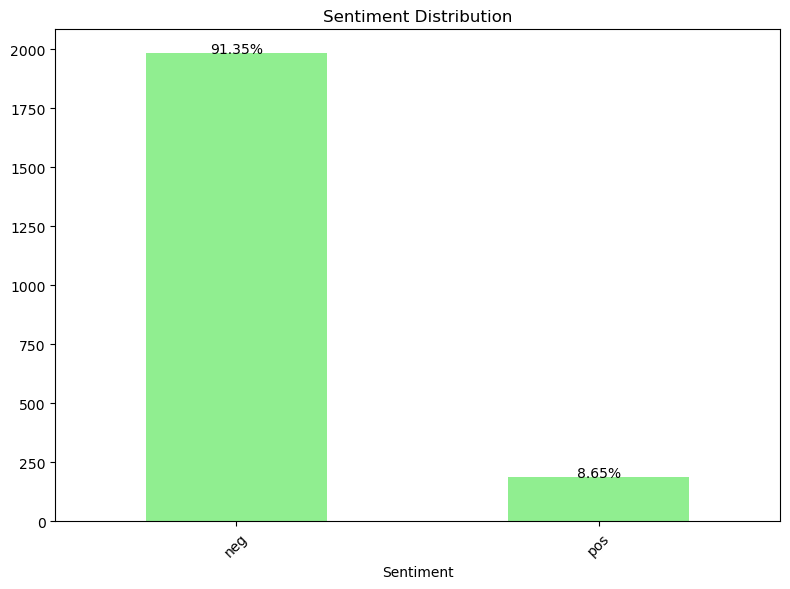

In [12]:
import matplotlib.pyplot as plt
sentiment_counts = data['sentiment'].value_counts()
total_count = sentiment_counts.sum()
percentages = (sentiment_counts / total_count) * 100

plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color='lightgreen')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('')
plt.xticks(rotation=45)
plt.tight_layout()

# Add labels in percentage format for each bar
for i, count in enumerate(sentiment_counts):
    percentage = percentages[i]
    plt.text(i, count + 0.1, f'{percentage:.2f}%', ha='center')

plt.show()

In [14]:
# Convert 'date' column to datetime if it's not already
data['date'] = pd.to_datetime(data['date'])

# Extract month and year from 'date' column
data['m/y'] = data['date'].dt.strftime('%m/%Y')

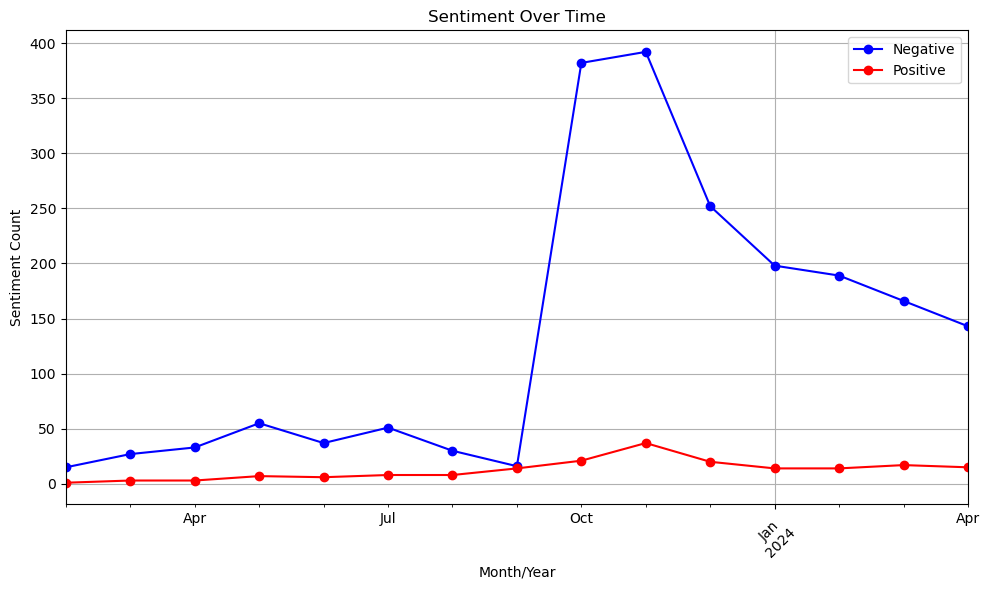

In [15]:
data['m/y'] = pd.to_datetime(data['m/y'])

# Sort data by 'm/y' in chronological order
sorted_data = data.sort_values('m/y')

# Group sorted data by 'm/y' and calculate the average sentiment for each month
monthly_sentiment_0 = sorted_data[sorted_data['sentiment#'] == 0].groupby('m/y')['sentiment#'].count()
monthly_sentiment_1 = sorted_data[sorted_data['sentiment#'] == 1].groupby('m/y')['sentiment#'].count()

# Plot the line plot
plt.figure(figsize=(10, 6))
monthly_sentiment_0.plot(kind='line', marker='o', color='b', label='Negative')
monthly_sentiment_1.plot(kind='line', marker='o', color='r', label='Positive')
plt.title('Sentiment Over Time - Al Jazeera')
plt.xlabel('Month/Year')
plt.ylabel('Sentiment Count')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

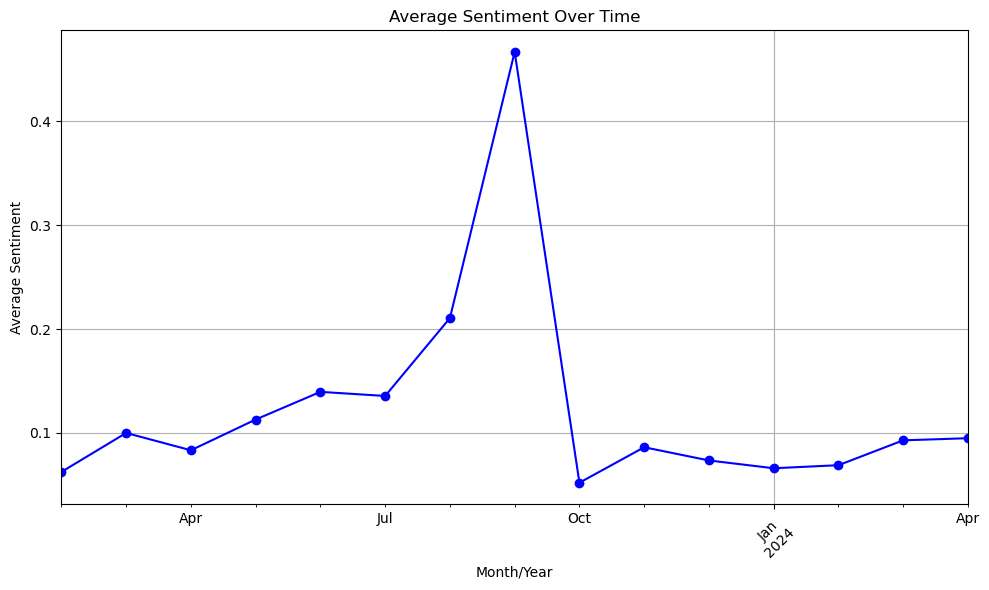

In [16]:
# Convert 'm/y' column to datetime type
data['m/y'] = pd.to_datetime(data['m/y'])

# Sort data by 'm/y' in chronological order
sorted_data = data.sort_values('m/y')

# Group sorted data by 'm/y' and calculate the average sentiment for each month
monthly_sentiment = sorted_data.groupby('m/y')['sentiment#'].mean()

# Plot the line plot
plt.figure(figsize=(10, 6))
monthly_sentiment.plot(kind='line', marker='o', color='b')
plt.title('Average Sentiment Over Time')
plt.xlabel('Month/Year')
plt.ylabel('Average Sentiment')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()